In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Exploration
Let's read the file into a DataFrame object and explore it

In [35]:
LABEL_COLUMN = 'label'
TWEET_COLUMN = 'tweet'

In [36]:
tweets_df = pd.read_csv('../../data/labeled_tweets.csv')
tweets_df.head()

,id,label,tweet
0,100068216876965888,Marketing,Social Media - Impact of Social Media on Small...
1,100523164500631552,Marketing,Local Business Blogging - What to Blog About h...
2,100991945391878144,Marketing,13 Hot Facebook Marketing Tips From the Top Pr...
3,101021386058903553,Marketing,"Short of blog ideas? ""Local Business Blogging ..."
4,101417008050094080,Marketing,Eleven Books That Will Rock Your World http://...


Let's  explore the lengths of our tweets

In [88]:
tweets_df['tweet_length'] = tweets_df[TWEET_COLUMN].apply(len)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f84bab4ce80>]],
      dtype=object)

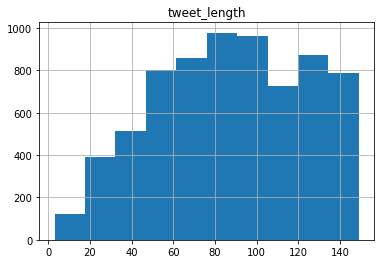

In [89]:
tweets_df.hist(['tweet_length'])

We'll see some statistics about the number of tokens for each tweet

In [78]:
tweets_df['tweet_tokens'] = tweets_df[TWEET_COLUMN].apply(lambda x: len(x.split(' ')))
tweets_df['tweet_tokens'].value_counts()

13    463
12    455
15    428
11    405
14    405
9     396
16    392
10    369
17    365
18    357
19    312
8     303
20    297
7     261
6     230
21    216
4     206
5     197
22    181
3     175
23    141
24    121
2      98
25     86
26     51
27     40
28     23
1      20
29     14
30      3
32      1
33      1
Name: tweet_tokens, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f84bb381e48>]],
      dtype=object)

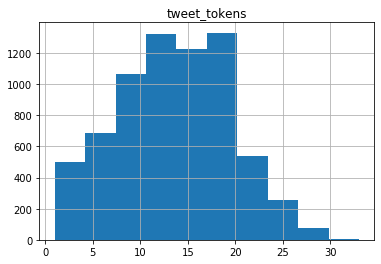

In [90]:
tweets_df.hist(['tweet_tokens'])

There is no real anomaly in tweet length and in the distribution of number of tokens for each tweet (for example, long tail). Hence, there is no need to filter out tweets from our labeled tweets set.

# Lables Exploration

We'll see how many samples we have from each category from our 2 categories

In [32]:
grouped_by_label = tweets_df.groupby(LABEL_COLUMN).count()
grouped_by_label.head()

,id,tweet
label,,
Marketing,3490,3490
Non Marketing,3522,3522


We can see that our data is pretty much balanaced between the two classes,
so we don't need to perform any balancing procedure.

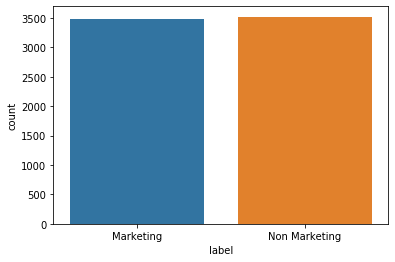

In [31]:
sns.countplot(x='label', data=tweets_df)

# Features Exploration

We'll see some important features for each class

In [96]:
import re
url_regex = re.compile(r'(http://www\.|https://www\.|http://|https://)?' +
        r'[a-z0-9]+([\-.]{1}[a-z0-9]+)*\.[a-z]{2,5}(:[0-9]{1,5})?(/.*)?')
tweets_df['contains_url'] = tweets_df[TWEET_COLUMN].apply(lambda x: True if re.search(url_regex, x) else False)

In [99]:
user_regex = re.compile(r'(@[\w_-]+)')
tweets_df['contains_user'] = tweets_df[TWEET_COLUMN].apply(lambda x: True if re.search(user_regex, x) else False)

In [112]:
grouped_by_label_user = tweets_df.groupby([LABEL_COLUMN, 'contains_user']).agg(['count'])

We can see that the user tag (for example @User1) is a very important feature as positive indicator if it's a marketing tweet

In [114]:
grouped_by_label_user.head()

id tweet tweet_length tweet_tokens contains_url
                            count count        count        count        count
label         contains_user                                                   
Marketing     False          2072  2072         2072         2072         2072
              True           1418  1418         1418         1418         1418
Non Marketing False          1046  1046         1046         1046         1046
              True           2476  2476         2476         2476         2476

In [115]:
grouped_by_label_url = tweets_df.groupby([LABEL_COLUMN, 'contains_url']).agg(['count'])

We can see that the url is a very important feature as negative indicator if it's a marketing tweet

In [117]:
grouped_by_label_url.head()

id tweet tweet_length tweet_tokens contains_user
                           count count        count        count         count
label         contains_url                                                    
Marketing     False          532   532          532          532           532
              True          2958  2958         2958         2958          2958
Non Marketing False         2925  2925         2925         2925          2925
              True           597   597          597          597           597